In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
#dataset = pd.read_csv('sample_data/kidney_disease.csv')
#dataset = pd.read_csv('sample_data/Data_COVID_AD.csv')

In [ ]:
data = pd.read_csv('sample_data/data_example_AD.csv')

In [ ]:
data=data.drop(['index','windex_ahrq','windex_vw','ad','dlb','ftd','vd'],1) ##deleting three feature##deleting three feature for all data

In [ ]:
dataset.head()

,chf,carit,valv,pcd,pvd,hypunc,hypc,para,ond,cpd,diabunc,diabc,hypothy,rf,ld,pud,aids,lymph,metacanc,solidtum,rheumd,coag,obes,wloss,fed,blane,dane,alcohol,drug,psycho,depre,score,index,wscore_ahrq,wscore_vw,windex_ahrq,windex_vw,Age,Gender,Ethnicity,Mortality,Race,ad
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,4-Jan,16,9,>=5,>=5,78,1,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,>=5,3,8,4-Jan,>=5,79,0,2,0,0,1
2,1,1,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,11,>=5,20,20,>=5,>=5,86,0,0,0,0,1
3,0,1,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,13,>=5,9,14,>=5,>=5,80,0,0,0,0,1
4,1,1,1,1,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,13,>=5,36,28,>=5,>=5,80,1,0,0,0,1


In [ ]:
data.shape

(388029, 39)

In [ ]:
# dataset[['htn','dm','cad','pe','ane']]=dataset[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
# dataset[['rbc','pc']] = dataset[['rbc','pc']].replace(to_replace={'abnormal':0,'normal':1})
# dataset[['pcc','ba']] = dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
# dataset[['appet']] = dataset[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
# dataset['classification']=dataset['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
# dataset.rename(columns={'classification':'class'},inplace=True)

In [ ]:
# # Further cleaning
# dataset['pe'] = dataset['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
# dataset['appet'] = dataset['appet'].replace(to_replace='no',value=0)
# dataset['cad'] = dataset['cad'].replace(to_replace='\tno',value=0)
# dataset['dm'] = dataset['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
# dataset.drop('id',axis=1,inplace=True)

In [ ]:
dataset.shape

(4176, 43)

In [ ]:
# # Data preprocessing
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values

In [ ]:
#columns = list(dataset.iloc[:,:-1].columns) 

In [ ]:
#dataset=dataset.drop(['index','windex_ahrq','windex_vw','ad'],1) ##deleting three feature##deleting three feature

In [ ]:
# Data preprocessing
X = data.drop(['Mortality'],axis=1)
y = data['Mortality']

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(tol=1e-3, random_state=0)
perceptron=ppn.fit(X_train, y_train)

In [ ]:
importance = ppn.coef_[0]

In [ ]:
importance

array([ 1.        ,  2.        ,  0.        ,  0.        ,  3.        ,
       -2.        ,  0.        , -2.        ,  1.        , -1.        ,
       -2.        ,  0.        ,  1.        ,  4.        ,  3.        ,
        0.        ,  0.        ,  1.        , -1.        ,  0.        ,
       -2.        ,  4.        ,  0.        ,  1.        ,  1.        ,
        0.        , -3.        , -5.        , -5.        , -1.        ,
       -1.        , -0.1       , -2.72972973, -0.35106383,  4.60465116,
        2.        ,  0.        ,  2.5       ])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
indices = np.argsort(importance)[::-1]

In [ ]:
indices

array([34, 13, 21,  4, 14, 37, 35,  1, 24,  8, 12, 17, 23,  0, 25, 16,  2,
        3,  6, 22, 15, 11, 36, 19, 31, 33, 29, 30,  9, 18, 10,  7,  5, 20,
       32, 26, 27, 28])

In [ ]:
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=importance, y=columns[indices[f]])
#Add chart labels
#plt.title(model_type + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [ ]:
columns = list(X.columns) 

In [ ]:
print("\nFeature ranking:\n")
for f in range(X_train.shape[1]): 
    print ("Feature", indices[f], ",", columns[indices[f]], round(importance [indices[f]],4))


Feature ranking:

Feature 34 , Age 4.6047
Feature 13 , rf 4.0
Feature 21 , coag 4.0
Feature 4 , pvd 3.0
Feature 14 , ld 3.0
Feature 37 , Race 2.5
Feature 35 , Gender 2.0
Feature 1 , carit 2.0
Feature 24 , fed 1.0
Feature 8 , ond 1.0
Feature 12 , hypothy 1.0
Feature 17 , lymph 1.0
Feature 23 , wloss 1.0
Feature 0 , chf 1.0
Feature 25 , blane 0.0
Feature 16 , aids 0.0
Feature 2 , valv 0.0
Feature 3 , pcd 0.0
Feature 6 , hypc 0.0
Feature 22 , obes 0.0
Feature 15 , pud 0.0
Feature 11 , diabc 0.0
Feature 36 , Ethnicity 0.0
Feature 19 , solidtum 0.0
Feature 31 , score -0.1
Feature 33 , wscore_vw -0.3511
Feature 29 , psycho -1.0
Feature 30 , depre -1.0
Feature 9 , cpd -1.0
Feature 18 , metacanc -1.0
Feature 10 , diabunc -2.0
Feature 7 , para -2.0
Feature 5 , hypunc -2.0
Feature 20 , rheumd -2.0
Feature 32 , wscore_ahrq -2.7297
Feature 26 , dane -3.0
Feature 27 , alcohol -5.0
Feature 28 , drug -5.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#dataset = pd.read_csv('sample_data/Perceptron_featureranking.csv')
dataset = pd.read_csv('sample_data/Perceptron_riskFactor.csv')


In [ ]:
dataset=dataset.drop['Feature'][14]

AttributeError: ignored

In [ ]:
dataset

,Feature,Value
0,Age,4.6047
1,rf,4.0000
2,coag,4.0000
3,pvd,3.0000
4,ld,3.0000
5,Race,2.5000
6,Gender,2.0000
7,carit,2.0000
8,fed,1.0000
9,ond,1.0000


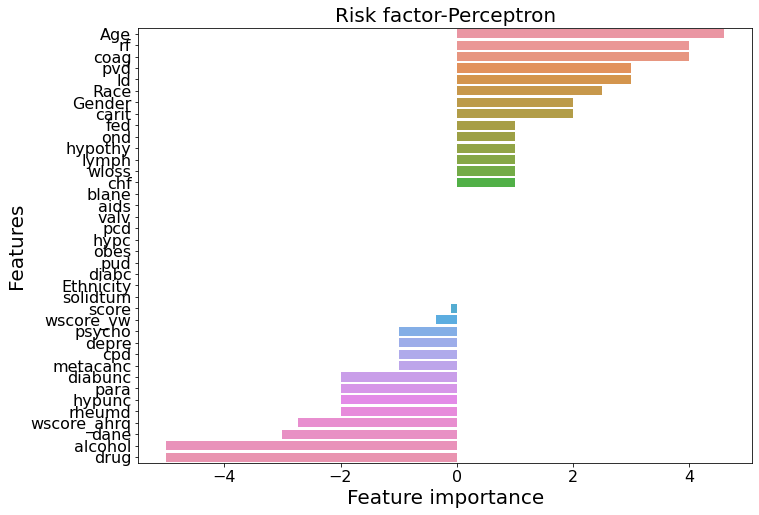

In [ ]:
plt.figure(figsize=(11,8))
#Plot Searborn bar chart
sns.barplot(x=dataset['Value'], y=dataset['Feature'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#Add chart labels
plt.title( 'Risk factor-Perceptron',fontsize=20)
plt.xlabel('Feature importance',fontsize=20)
plt.ylabel('Features',fontsize=20)
plt.savefig('Riskfactor_Perceptron.png',dpi=300)


In [ ]:
plt.draw()
plt.savefig('Riskfactor_MLP2.png',dpi=300)

<Figure size 432x288 with 0 Axes>

In [ ]:
from google.colab import files
files.download('Riskfactor_Perceptron.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature importance',fontsize=16)
    plt.xlabel('Feature importance',fontsize=16)
    plt.ylabel('Feature name',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig( model_type +' feature importance.png')

In [ ]:
dataset = pd.read_csv('sample_data/Venn diagram file.csv')


In [ ]:
dataset

,AdaBoost,Perceptron,Random forest
0,hemo,hemo,hemo
1,sc,sg,sg
2,sg,pe,pcv
3,age,al,sc
4,bu,dm,al
5,rc,rbc,rc
6,bgr,htn,htn
7,pcv,pc,bgr
8,pe,su,dm
9,dm,bp,bu


In [ ]:
#set1 = set(dataset[])

In [ ]:
from matplotlib_venn import venn3

In [ ]:
set1 = set(['hemo','sc','age','sg','bu','rc','bgr','pcv', 'pe','dm','wc','pot','al','bp','htn'])






In [ ]:
set2 = set(['hemo','sg','pe','al','dm','rbc','htn','pcv','bp','pc','su','sc','sod','ane','wc'])

In [ ]:
set3 = set(['hemo','sg','pcv','sc','al','rc','htn','bgr','dm','bu','sod','su','pot','pe','bp'])

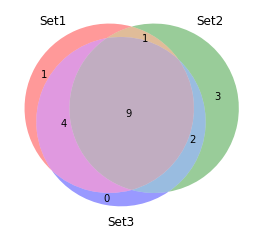

In [ ]:
venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()